# The Sparks Foundation- Data Science and Business Analytics Internship

# Task 3 : Exploratory Data Analysis - Retail

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
As a business manager, try to find out the weak areas where you can work to make more profit.
What all business problems you can derive by exploring the data?
I used Python to perform EDA on this dataset.

# Author : Rahul kumar

Data Set :https://bit.ly/3i4rbWl

In [1]:
# Importing the required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the csv dataset
df=pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


ship mode : by what mean the package or product is deliverd to the customer its s an important
    things to note because profit margin depends on it

segment : by what party the product has been purchased it s important as obviously product
    ordered by a company or cooperate would bee more profitable then a consumer
country, city , state , region and postacl code all tells us hoq much wideer the business is

category : what types of products the company sells

subcategory :just a part of the category the sub divison sales , quantity , discount and profit
    we all are familiar with these terms they depend on order basis

# Check for null values

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.shape

(9994, 13)

In [8]:
D=df[df.duplicated(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],keep=False)]
D.head

<bound method NDFrame.head of            Ship Mode      Segment        Country           City         State  \
568   Standard Class    Corporate  United States        Seattle    Washington   
591   Standard Class     Consumer  United States          Salem        Oregon   
935   Standard Class  Home Office  United States   Philadelphia  Pennsylvania   
950   Standard Class  Home Office  United States   Philadelphia  Pennsylvania   
1186  Standard Class    Corporate  United States        Seattle    Washington   
1479  Standard Class     Consumer  United States  San Francisco    California   
2803  Standard Class     Consumer  United States  San Francisco    California   
2807    Second Class     Consumer  United States        Seattle    Washington   
2836  Standard Class     Consumer  United States    Los Angeles    California   
3127  Standard Class     Consumer  United States  New York City      New York   
3405  Standard Class  Home Office  United States       Columbus          Ohio  

In [9]:
df=pd.DataFrame.drop_duplicates(df)
df.shape

(9977, 13)

In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Data Visualization

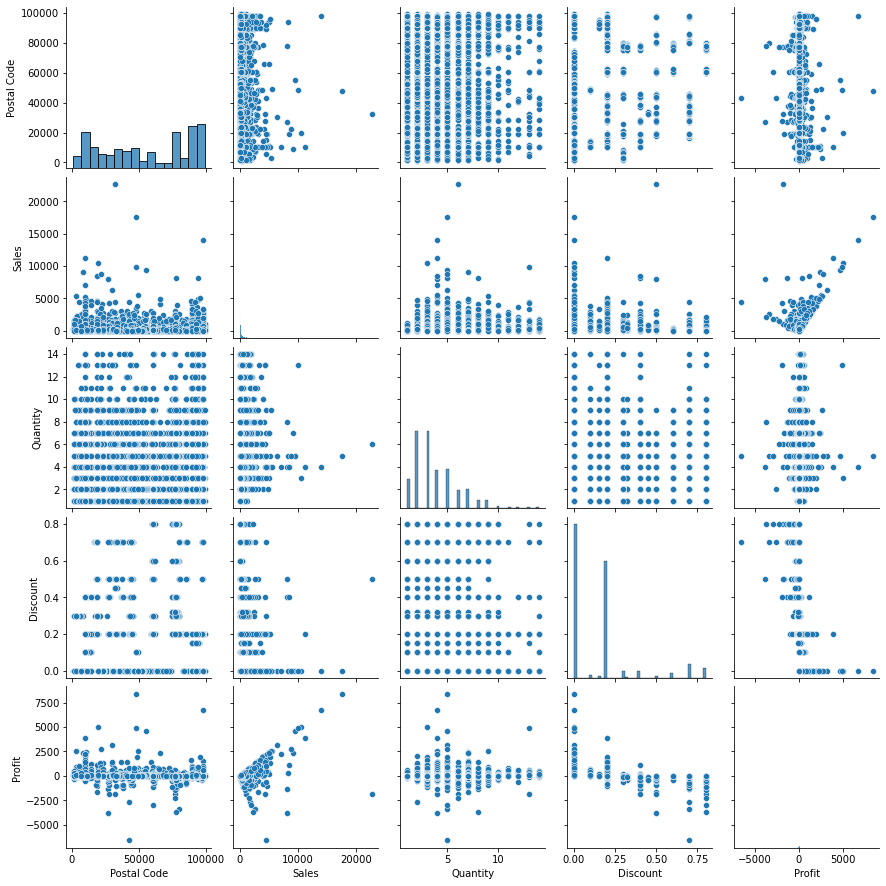

In [11]:
sns.pairplot(df)

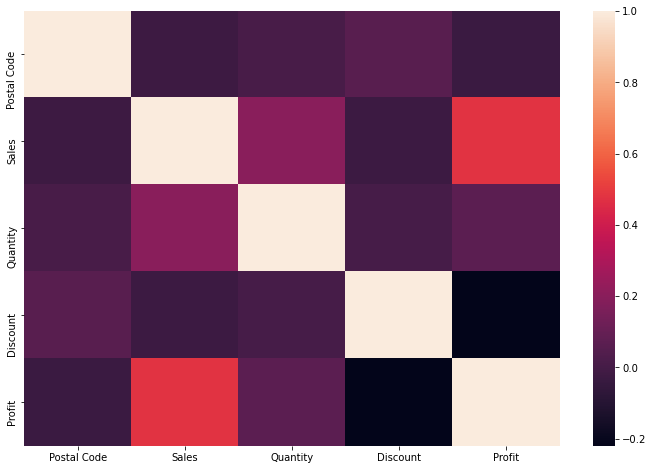

In [12]:
fig,axes = plt.subplots(1,1,figsize=(12,8))
sns.heatmap(df.corr())
plt.show()

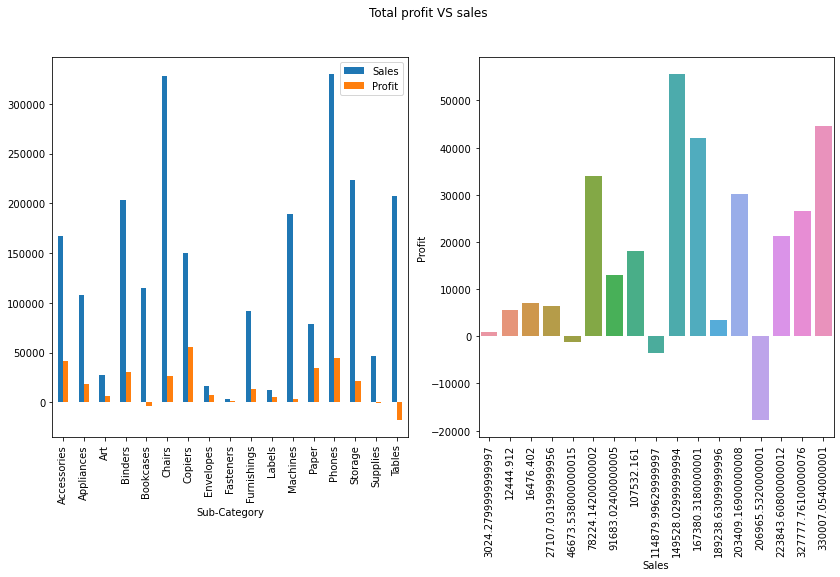

In [13]:
fig,axes = plt.subplots(1,2,figsize=(14,7))
fig.suptitle("Total profit VS sales ")
sns.barplot(data=df.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

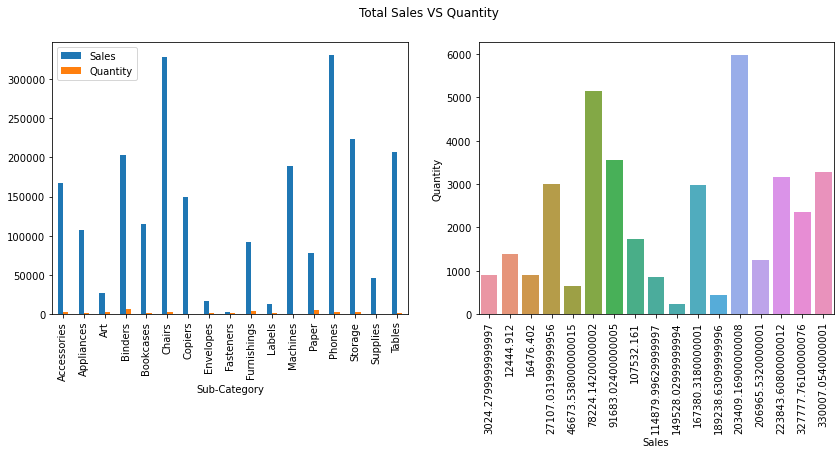

In [14]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total Sales VS Quantity ")
sns.barplot(data=df.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity',ax=axes[1])
df.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

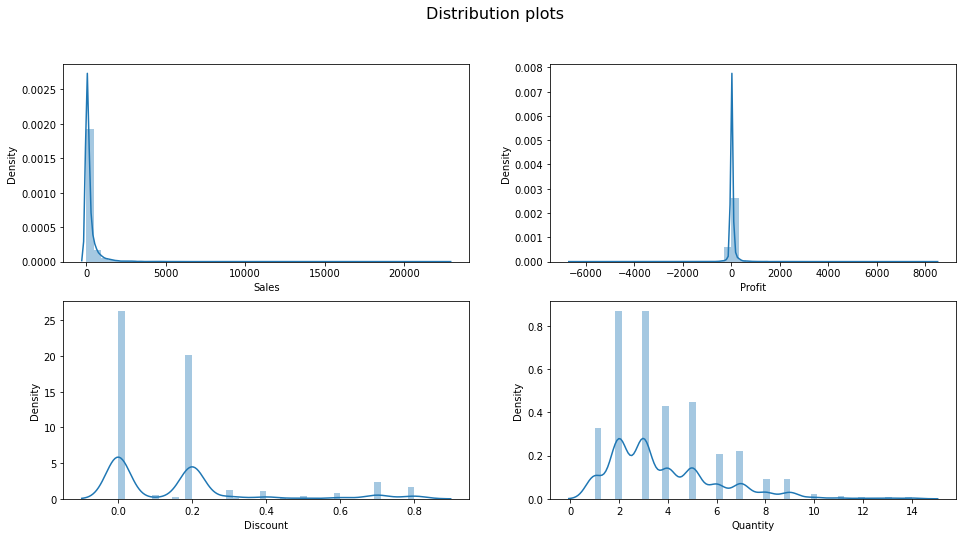

In [15]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

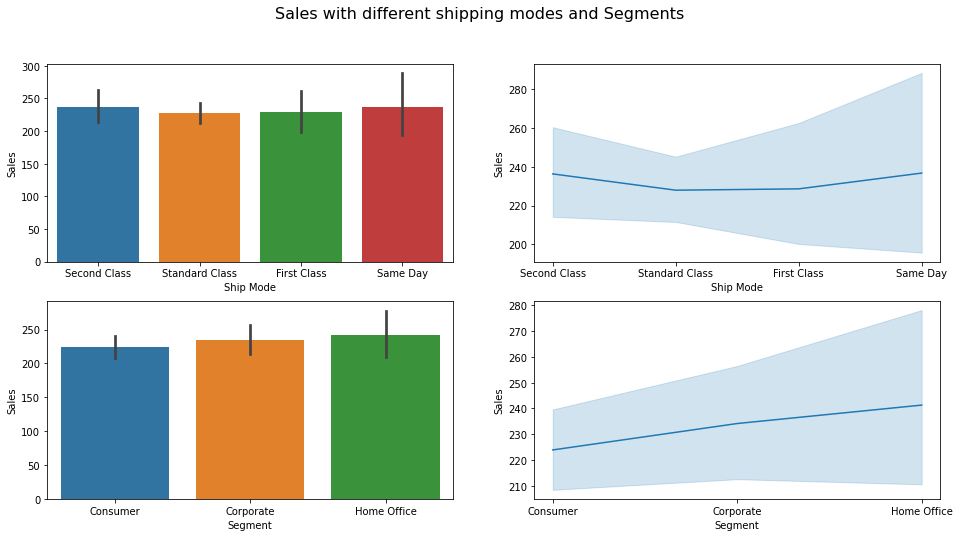

In [16]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)
sns.barplot(df['Ship Mode'],df['Sales'],ax=axes[0,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax=axes[0,1])
sns.barplot(df['Segment'],df['Sales'],ax=axes[1,0])
sns.lineplot(df['Segment'],df['Sales'],ax=axes[1,1])
plt.show() 

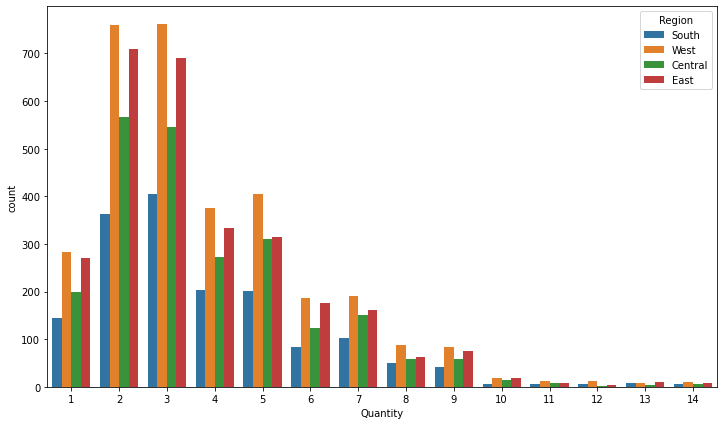

In [17]:
fig,ax= plt.subplots(1,1,figsize=(12,7))
sns.countplot(df['Quantity'],hue=df['Region'])
plt.show()

# Thank You :)

# 